In [18]:
import numpy as np
from DataLoader.utils import load_netmats
from DataLoader.utils import get_unique_edges
from FSLNets.nets_glm import nets_glm
from DataLoader.MetadataHelper import *
from sklearn.preprocessing import LabelEncoder

In [2]:
# Set design and contrast files for glm
des = "/home/tadlington/designs/des100_sex_confound_mean.mat"
con = "/home/tadlington/designs/des_sex_confound_mean.con"

In [28]:
fnets = load_netmats('/home/tadlington/fNETMATS/netmats-ridgereg-nozstat.txt')


In [ ]:
lnets = load_netmats('/home/tadlington/bitbucket/random/100307/L/fmri_dr/netmats/netmats-ridgereg-nozstat.txt')
rnets = load_netmats('/home/tadlington/bitbucket/random/100307/R/fmri_dr/netmats/netmats-ridgereg-nozstat.txt')
lnets = get_unique_edges(lnets)

rnets = get_unique_edges(rnets)
netmats = np.hstack((lnets, rnets))

In [19]:
subject_ids = [100307,100408,101107,101309,101915,103111,103414,
                            103818,105014,105115,106016,108828,110411,111312,
                            111716,113619,113922,114419,115320,116524,117122,
                            118528,118730,118932,120111,122317,122620,123117,
                            123925,124422,125525,126325,127630,127933,128127,
                            128632,129028,130013,130316,131217,131722,133019,
                            133928,135225,135932,136833,138534,139637,140925,
                            144832,146432,147737,148335,148840,149337,149539,
                            149741,151223,151526,151627,153025,154734,156637,159340,160123,161731,162733,163129,176542,178950,
                            188347,189450,190031,192540,196750,198451,199655,
                            201111,208226,211417,211720,212318,214423,221319,
                            239944,245333,280739,298051,366446,397760,414229,
                            499566,654754,672756,751348,756055,792564,856766,
                            857263,899885]
metadata = load_patient_metadata('../unrestricted_sofira_11_17_2015_6_15_1.csv', subject_measures=["Gender"], subjects=subject_ids)
print metadata.shape
le = LabelEncoder()
metadata = le.fit_transform(metadata["Gender"].values)

(100, 1)


In [4]:
p_uncorrected, p_corrected, FDRThresh = nets_glm(netmats, des, con)

0



In [29]:
fp_uncorrected, fp_corrected, FDRThresh = nets_glm(fnets, des, con)

0



In [43]:
import Predictors.ElasticNetTuner as EN
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import accuracy_score

def predict_var_num_features(features, metadata, feature_nums):
    """
    :param: features = the features to predict with (Sorted in order of importance)
    :param: metadata = measures to predict
    :feature_nums: list like of number of features to use in each prediction:
    returns dict of {feature_num: score}
    """
    feature_num_scores = {}
    for num in feature_nums:
        print num
        feats = features[:, 0:num]
        tuner = EN.ElasticNetTuner(n_jobs=-1, cv =5)
        predictions = cross_val_predict(tuner, feats, y=metadata, cv=10, verbose=2)
        rp = np.round(predictions)
        score = accuracy_score(rp, metadata)
        print score
        feature_num_scores[num] = score
    return feature_num_scores
        

In [91]:
from Feature_Analysis.EdgeUtils import get_top_n_features
#Get sorted indices of most important features
print sum(sum(fp_uncorrected > 0.95))
fnum_edges = fnets.shape[1]
print fnum_edges
ftop_indices, scores = get_top_n_features(fp_corrected, fnum_edges)
ffeatures = fnets[:, ftop_indices]
ffeature_nums = [10, 25,50, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 15000, num_edges]
#num_scores = predict_var_num_features(features, metadata, feature_nums)
#fnum_scores = predict_var_num_features(ffeatures, metadata, ffeature_nums)
fs = predict_var_num_features(ffeatures, metadata, [250, 750])


868
18769
250
[[-0.01966   -0.029296   0.0085242 ..., -0.017969   0.0079079  0.018057 ]
 [ 0.002977  -0.034053  -0.0030621 ..., -0.06963   -0.027727   0.0075261]
 [-0.033782  -0.021707  -0.0082871 ...,  0.0064345 -0.043933  -0.01163  ]
 ..., 
 [-0.031204  -0.0025712 -0.0048705 ..., -0.036461   0.0053274  0.0061473]
 [ 0.02372   -0.015543  -0.012474  ..., -0.017747  -0.021119   0.014756 ]
 [-0.0067206 -0.014194  -0.023734  ...,  0.040861  -0.0080153 -0.0029892]]
[[-0.030095   0.0073502 -0.013832  ..., -0.00735   -0.025133   0.012709 ]
 [-0.041871  -0.017115  -0.032078  ..., -0.013927  -0.020656  -0.0047494]
 [-0.061441   0.0046133 -0.015056  ..., -0.058942  -0.023468   0.017212 ]
 ..., 
 [ 0.01341   -0.039928  -0.021497  ..., -0.02438   -0.0034902  0.020525 ]
 [-0.04857    0.0048346  0.0015383 ..., -0.0216    -0.015901  -0.0010471]
 [-0.044126  -0.034189  -0.046579  ...,  0.021706  -0.011837  -0.015152 ]]
[[-0.0049108  -0.07639    -0.0058779  ..., -0.011367   -0.0133     -0.013626  ]
 [

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.6s finished


[[-0.00079179 -0.011514   -0.0051515  ...,  0.0079079   0.018057   -0.005908  ]
 [ 0.014754   -0.0090913  -0.063397   ..., -0.027727    0.0075261  -0.016737  ]
 [-0.00060395 -0.014449   -0.066175   ..., -0.043933   -0.01163     0.033894  ]
 ..., 
 [ 0.05588    -0.025408   -0.0611     ...,  0.0053274   0.0061473  -0.016044  ]
 [ 0.016042    0.02895    -0.083367   ..., -0.021119    0.014756    0.014508  ]
 [-0.03187     0.0012944  -0.046067   ..., -0.0080153  -0.0029892  -0.010975  ]]
[[ -1.90270000e-03   8.55350000e-02   4.34760000e-02 ...,   1.71610000e-02
   -1.87740000e-04  -7.88570000e-03]
 [  4.18330000e-02   5.74130000e-02   6.91260000e-02 ...,   1.11060000e-02
   -4.30110000e-02   8.02150000e-03]
 [  5.14860000e-03   1.17810000e-01   5.29660000e-02 ...,  -1.38350000e-02
   -6.54840000e-02   2.27650000e-02]
 ..., 
 [  4.99280000e-02   1.01190000e-01   2.11180000e-02 ...,  -2.42030000e-02
   -7.35360000e-02   3.20290000e-02]
 [  2.07410000e-02   9.28460000e-02   9.04300000e-04 ...,

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.1s finished


In [90]:
from Feature_Analysis.EdgeUtils import get_top_n_features
#Get sorted indices of most important features
print sum(sum(p_uncorrected > 0.95))
num_edges = netmats.shape[1]
print num_edges
top_indices, scores = get_top_n_features(p_corrected, num_edges)
features = netmats[:, top_indices]
feature_nums = [10, 25,50, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 15000, num_edges ]
#num_scores = predict_var_num_features(features, metadata, feature_nums)
rs = predict_var_num_features(features, metadata, [250, 750])


1063
22650
250
[[-0.00093359 -0.018644   -0.0010322  ...,  0.018975    0.0014616  -0.024433  ]
 [-0.023225   -0.0039164   0.038931   ...,  0.002157   -0.023203    0.028014  ]
 [-0.038957    0.014346    0.01304    ...,  0.0084325   0.058666   -0.031799  ]
 ..., 
 [ 0.015555   -0.038608    0.016312   ...,  0.0063112   0.061126   -0.015439  ]
 [-0.0076286   0.016638    0.02941    ...,  0.040947    0.021119    0.0095547 ]
 [ 0.0033063  -0.0048604   0.040682   ...,  0.023012    0.1205      0.0017745 ]]
[[-0.022526    0.017107    0.065382   ...,  0.0048583   0.0033411   0.011901  ]
 [-0.02383     0.058038    0.05987    ..., -0.010702    0.027533   -0.030418  ]
 [-0.048545    0.055596    0.047593   ...,  0.02802     0.00084569
   0.013441  ]
 ..., 
 [-0.012575   -0.028509    0.035094   ..., -0.0017676  -0.027593    0.033025  ]
 [-0.0074254   0.027951    0.035628   ...,  0.032741   -0.023875    0.012477  ]
 [-0.04931     0.017708    0.068257   ...,  0.00053544  0.010895    0.0093655 ]]
[[-0.00

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.0s finished


[[-0.0064334   0.0070902  -0.00093359 ...,  0.016892    0.035595    0.0079692 ]
 [ 0.036999   -0.017865   -0.023225   ..., -0.0096552  -0.02147     0.024779  ]
 [ 0.021086   -0.025946   -0.038957   ...,  0.017227   -0.017059    0.0083447 ]
 ..., 
 [ 0.0046614   0.004739    0.015555   ..., -0.0030498   0.0060832   0.014195  ]
 [ 0.0018414  -0.010265   -0.0076286  ...,  0.02388     0.012672   -0.0055755 ]
 [-0.013808   -0.0062535   0.0033063  ...,  0.024698   -0.0065779  -0.013766  ]]
[[-0.019309   0.0030824  0.0051251 ..., -0.036075   0.0014493  0.068314 ]
 [ 0.019107  -0.015761  -0.016962  ...,  0.019824  -0.042778  -0.014411 ]
 [ 0.0306    -0.0054692  0.0028643 ..., -0.043437  -0.07691    0.12931  ]
 ..., 
 [ 0.0059387  0.024707  -0.026728  ...,  0.019898   0.0035084  0.029841 ]
 [-0.001122  -0.0040291 -0.0053057 ...,  0.0017566 -0.0083554  0.049567 ]
 [-0.0020338 -0.022497   0.0057695 ...,  0.0073219 -0.020891   0.015982 ]]
[[ 0.010342   -0.008823    0.017043   ..., -0.0035427  -0.00

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.7s finished


In [101]:
print rnum_scores
rkeys = sorted(rnum_scores.keys())
rscores = [rnum_scores[key] for key in rkeys]

{100: 0.46000000000000002, 1000: 0.63, 7500: 0.68000000000000005, 10: 0.42999999999999999, 2500: 0.68000000000000005, 750: 0.60999999999999999, 10000: 0.66000000000000003, 5000: 0.65000000000000002, 50: 0.42999999999999999, 500: 0.48999999999999999, 1750: 0.64000000000000001, 15000: 0.71999999999999997, 25: 0.46999999999999997, 22650: 0.66000000000000003}


In [102]:
print fnum_scores
fkeys = sorted(rnum_scores.keys())
fscores = [fnum_scores[key] for key in fkeys]

{100: 0.55000000000000004, 1000: 0.76000000000000001, 7500: 0.87, 10: 0.46000000000000002, 2500: 0.84999999999999998, 750: 0.72999999999999998, 10000: 0.85999999999999999, 5000: 0.85999999999999999, 50: 0.51000000000000001, 500: 0.68999999999999995, 1750: 0.77000000000000002, 15000: 0.83999999999999997, 25: 0.47999999999999998, 22650: 0.84999999999999998}


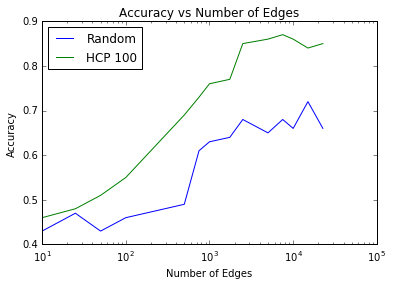

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(rkeys, rscores, label="Random")
plt.plot(fkeys, fscores, label="HCP 100")
plt.xscale("log")
plt.xlabel("Number of Edges")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Edges")
plt.legend(loc=2)
plt.show()
